# SciPi section in QuantEcon. Roots and Fixed points

This function implements the root finding bisection alogorithm (split the interval repetitively, narrowing on the root), assuming that $f$ is a real-valued function defined on $[a,b]$ with $f(a) < 0 < f(b)$.

In [2]:
def Bisection(f, a, b, tol):
    assert f(a) <= 0 and f(b) >= 0, 'if the continuous function has a root, it is not unique'
    """
    Implements the root finding bisection alogorithm (split the interval repetitively, narrowing on the root),
    assuming that f is a real-valued function defined on [a,b] with f(a) < 0 < f(b).
    """
    lower = a
    upper = b
    half = (upper + lower) * 0.5
    
    while abs(upper - lower) > tol:
        if f(half) > 0:
            upper = half
        else:
            lower = half
        half = (upper + lower) * 0.5
    
    return f(half), half

The following is a trial of the Bisection algorithm as coded above.

In [2]:
f = lambda x: x**2 - 1

Bisection(f, -0.5, 3, 0.001)

(0.00012207403779029846, 1.00006103515625)

Below we use the Bisection and the Newton-Raphson method from the Scipy package.

In [7]:
import numpy as np
from scipy.optimize import newton
from scipy.optimize import bisect
from scipy.optimize import brentq

g = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
tol = 10e-8

print Bisection(g, -0.5, 3, 10e-5), 'bisection method from my code'
print bisect(g, 0 ,1), 'bisection method from Scipy'
print newton(g, 0.3), 'Newton-Raphson method'
print brentq(g, 0, 1), 'Hybrid method not as fast as Newton-Raphson but more stable'

(2.1072903912067176e-05, 0.4082984924316406) bisection method from my code
0.40829350428 bisection method from Scipy
0.408293504279 Newton-Raphson method
0.408293504279 Hybrid method not as fast as Newton-Raphson but more stable


Now that we have confidence that all three methods give the same answer, for this example, we want to compare the speed of the respective codes.

In [4]:
timeit Bisection(g, -0.5, 3, 10e-5)

10000 loops, best of 3: 84.8 µs per loop


In [5]:
timeit bisect(g, 0 ,1)

10000 loops, best of 3: 158 µs per loop


In [6]:
timeit newton(g, 0.3)

10000 loops, best of 3: 37.8 µs per loop


In [6]:
timeit brentq(g, 0, 1)

10000 loops, best of 3: 42.4 µs per loop


Finding a fixed point is related to finding a root as follows: the fixed point of $f$ is the root of $f(x) - x$.

In [8]:
from scipy.optimize import fixed_point

f = lambda x: g(x) + x

fixed_point(f, 0.4)

0.40829350427936706

The minimum of a smooth function is a root of the first derivative.

In [4]:
from scipy.optimize import fminbound
from scipy.optimize import bisect

# This finds the minimum of the function on the interval [-1, 2].
print fminbound(lambda x: (x-0.234)**2, -1, 2), 'result using fminbound'

# This finds a root of the derivative on the inteval [-1, 2].
print bisect(lambda x: 2*(x-0.234), -1, 2), 'result using the bisection method'

0.234 result using fminbound
0.234 result using the bisection method


## Computing derivatives
This video was helpful https://www.youtube.com/watch?v=SFI_l96Oss4

Analytic derivative: 6*x
Numerical derivative: 12.0


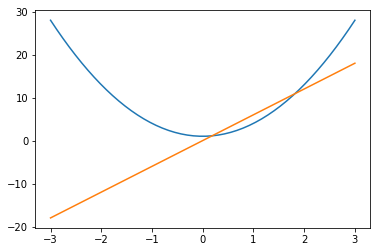

In [1]:
'''
Note that P must be smooth over the entire real line (i.e. do not truncate P at negative q and allow P to be negative)
otherwise the derivative is affected even when evaluated in the interior of the smooth parts of Pprime
'''
# Analytical approach
import sympy as sp
x = sp.Symbol('x')
print('Analytic derivative:', sp.diff(3*x**2 + 1, x)) 

# Numerical approach
from scipy.misc import derivative
def f(x):
    return 3*x**2+1
print('Numerical derivative:', derivative(f, 2))


def f_prime_symbolic(x):
    return derivative(f, x)
    
#plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(-3,3)
plt.plot(y, f(y))
plt.plot(y, f_prime_symbolic(y))